## Removal of seasonality

### Import libraries

In [1]:
import pandas as pd
import statsmodels.api as sm

### Parameters  

In [2]:
csv_in = '../iniadMaterial/2021/dm-0102/temp_tokyo_since2015-utf8.csv'

In [3]:
df_season = pd.read_csv(csv_in, delimiter=',', skiprows=1, header=0)
df_season['Date'] = pd.to_datetime(df_season['Date'], format="%Y-%m-%d")
print(df_season.shape)
print(df_season.info())
display(df_season.head())

(1323, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323 entries, 0 to 1322
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1323 non-null   datetime64[ns]
 1   Average(deg C)  1323 non-null   float64       
 2   High(deg C)     1323 non-null   float64       
 3   Low(deg C)      1323 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 41.5 KB
None


,Date,Average(deg C),High(deg C),Low(deg C)
0,2015-01-01,3.7,8.2,0.7
1,2015-01-02,2.7,7.9,-2.2
2,2015-01-03,3.8,8.9,-1.1
3,2015-01-04,4.0,9.3,-0.4
4,2015-01-05,6.9,12.9,1.3


### Extract average temperature  

In [4]:
ave_temp = df_season['Average(deg C)']
ave_temp.index = df_season['Date']  # should set Date information as index
ave_temp_weekly = ave_temp.resample('W').mean()  # Obtain average per week
print(ave_temp_weekly.dtype)
display(ave_temp_weekly.head())

float64


Date
2015-01-04    3.550000
2015-01-11    6.985714
2015-01-18    6.185714
2015-01-25    5.414286
2015-02-01    5.571429
Freq: W-SUN, Name: Average(deg C), dtype: float64

### See the original data

<AxesSubplot:xlabel='Date'>

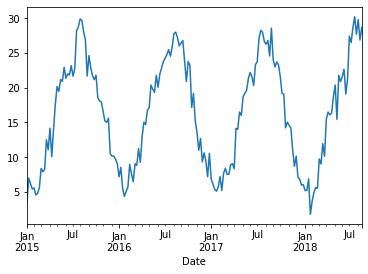

In [5]:
ave_temp_weekly.plot(kind='line')

### Seasonal decompose  

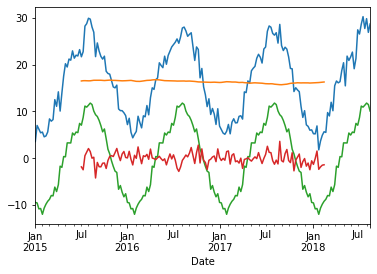

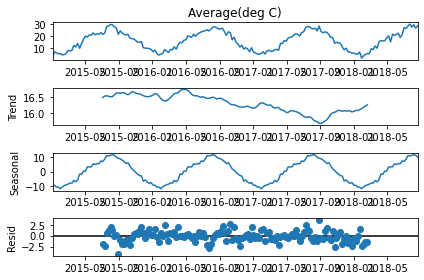

In [6]:
result = sm.tsa.seasonal_decompose(ave_temp_weekly)  # Analysis of seasonality
result.observed.plot()  # original data
result.trend.plot()  # without seasonality
result.seasonal.plot()  # seasonality
result.resid.plot()  # residual
pfig = result.plot()  # all in one figure

In [7]:
csv_in = '../iniadMaterial/2021/dm-0102/prec_tokyo_since2011-utf8.csv'
df_prec = pd.read_csv(csv_in, delimiter=',', skiprows=1, header=0)
df_prec['Date'] = pd.to_datetime(df_prec['Date'], format="%Y-%m-%d")
print(df_prec.shape)
print(df_prec.info())
display(df_prec.head())

(2922, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2922 non-null   datetime64[ns]
 1   Prec(mm)  2922 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 45.8 KB
None


,Date,Prec(mm)
0,2011-01-01,0.0
1,2011-01-02,0.0
2,2011-01-03,0.0
3,2011-01-04,0.0
4,2011-01-05,0.0


In [9]:
ave_prec = df_prec['Prec(mm)']
ave_prec.index = df_prec['Date']
ave_prec_monthly = ave_prec.resample('M').mean()
print(ave_prec_monthly.dtype)
display(ave_prec_monthly.head())

float64


Date
2011-01-31    0.112903
2011-02-28    5.392857
2011-03-31    2.387097
2011-04-30    3.200000
2011-05-31    6.887097
Freq: M, Name: Prec(mm), dtype: float64

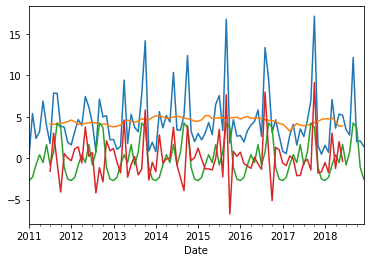

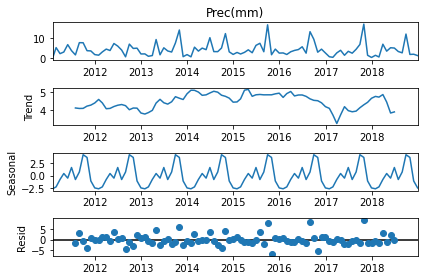

In [10]:
result = sm.tsa.seasonal_decompose(ave_prec_monthly)  # Analysis of seasonality
result.observed.plot()  # original data
result.trend.plot()  # without seasonality
result.seasonal.plot()  # seasonality
result.resid.plot()  # residual
pfig = result.plot()  # all in one figure